<a href="https://colab.research.google.com/github/Pax-Nguyen/Restaurant-tips-analysis/blob/main/Restaurant%20Tips%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍽️ Restaurant Tips Analysis**

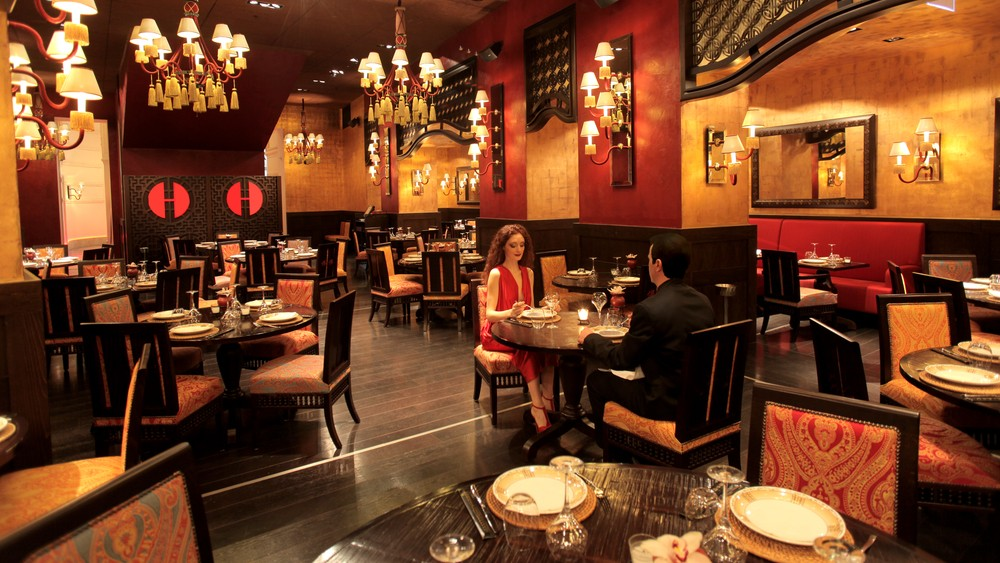

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

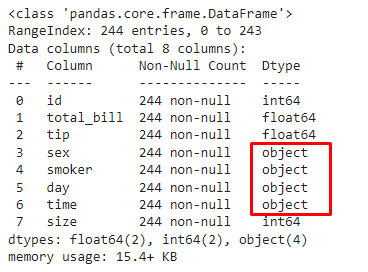

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df = df.query('smoker == "Yes"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.head()

,id,total_bill,tip,sex,smoker,day,time,size
56,56,38.01,3.0,Male,Yes,Sat,Dinner,4
58,58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,61,13.81,2.0,Male,Yes,Sat,Dinner,2
62,62,11.02,1.98,Male,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
36,36,16.31,2.0,Male,No,Sat,Dinner,3
239,239,29.03,5.92,Male,No,Sat,Dinner,3
87,87,18.28,4.0,Male,No,Thur,Lunch,2
59,59,48.27,6.73,Male,No,Sat,Dinner,4
48,48,28.55,2.05,Male,No,Sun,Dinner,3


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
common_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# YOUR CODE
# Make a list of values
common_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1
2. Insight 1

**General conclusion:**

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

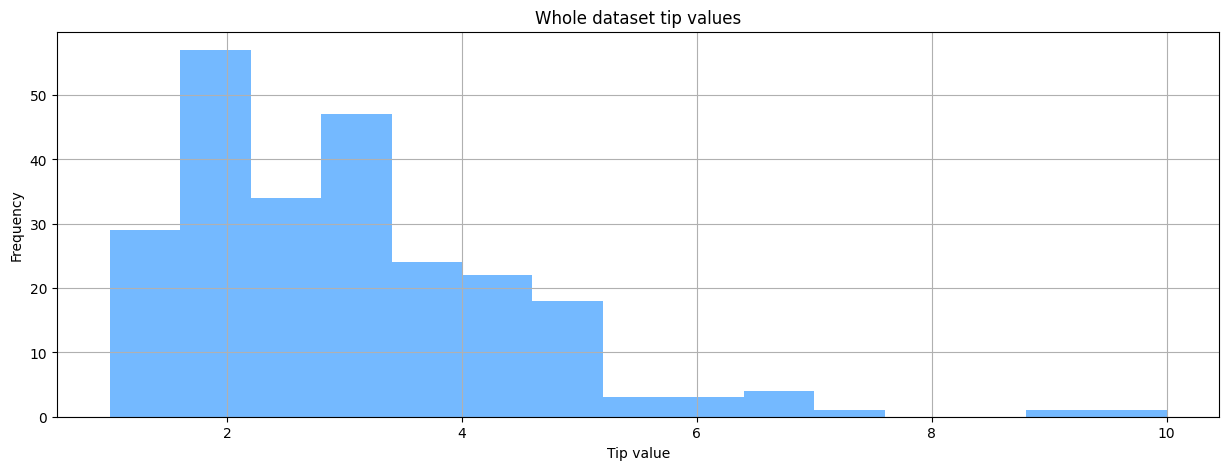

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], bins = 15, color="#74b9ff")

# Set axis labels and title
plt.xlabel("Tip value")
plt.ylabel("Frequency")
plt.title("Whole dataset tip values")

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

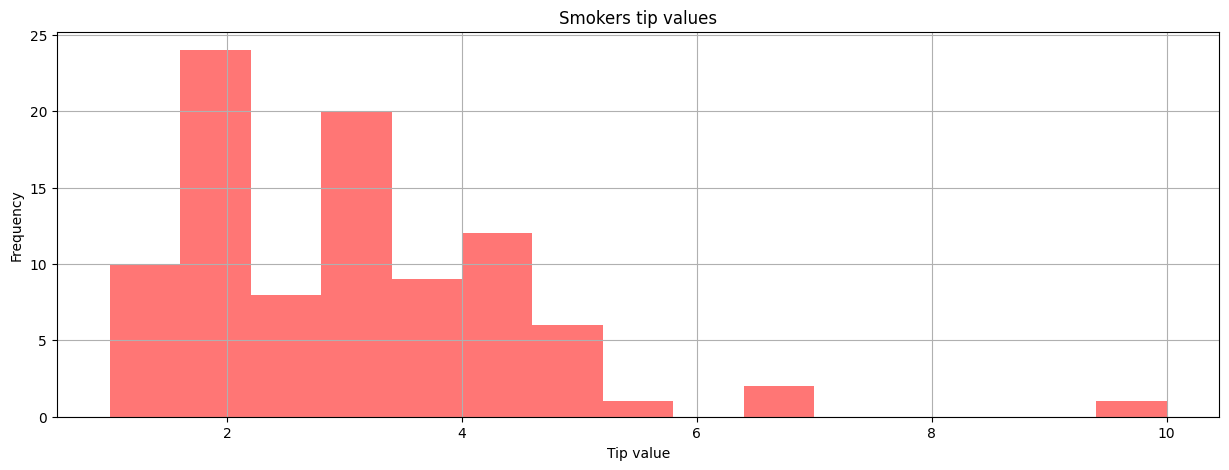

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], bins = 15, color="#ff7675")

# Set axis labels and title
plt.xlabel("Tip value")
plt.ylabel("Frequency")
plt.title("Smokers tip values")

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

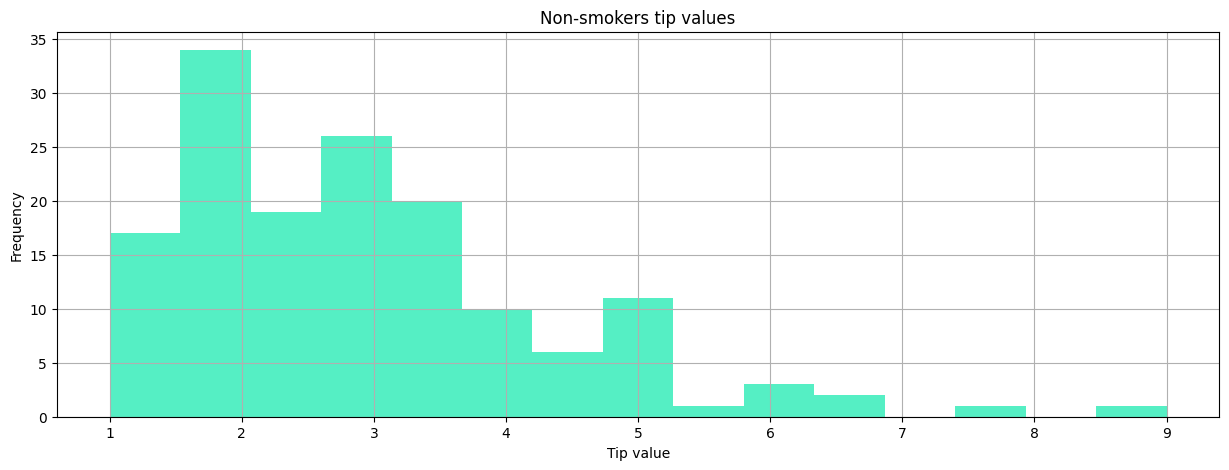

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], bins = 15, color="#55efc4")

# Set axis labels and title
plt.xlabel("Tip value")
plt.ylabel("Frequency")
plt.title("Non-smokers tip values")

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

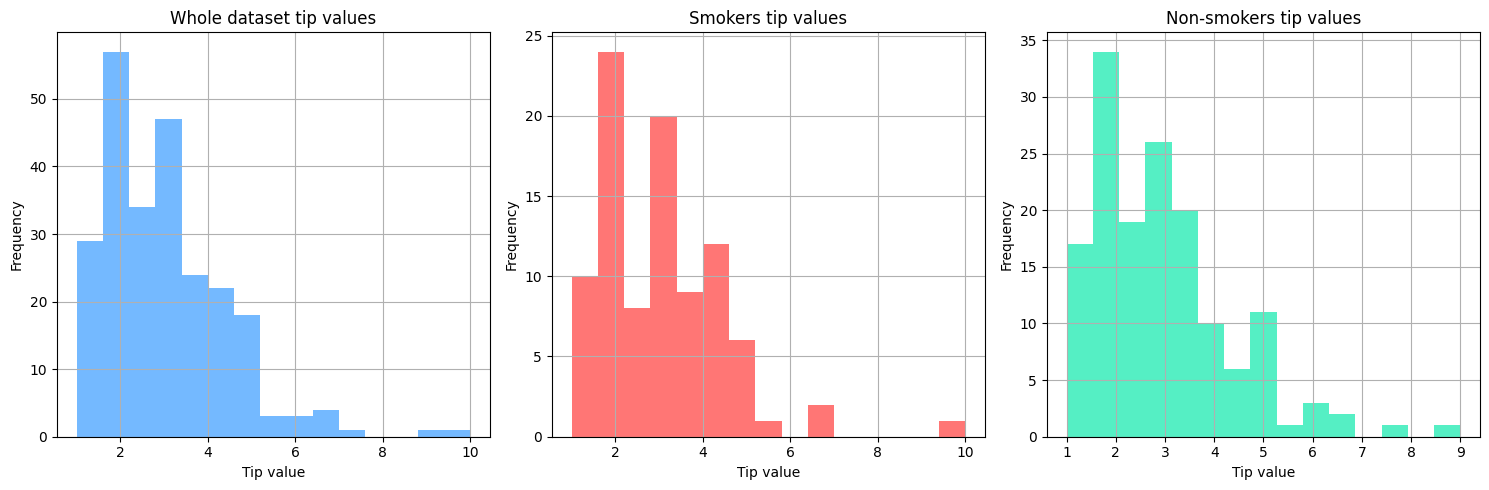

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Chart 1: Histogram of tip values
axes[0].hist(df['tip'], bins = 15, color="#74b9ff")
axes[0].set_xlabel("Tip value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Whole dataset tip values")
axes[0].grid(True)

# Chart 2: Histogram of total bill values
axes[1].hist(smokers_df['tip'], bins = 15, color="#ff7675")
axes[1].set_xlabel("Tip value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Smokers tip values")
axes[1].grid(True)

# Chart 3: Histogram of party size
axes[2].hist(non_smokers_df['tip'], bins = 15, color="#55efc4")
axes[2].set_xlabel("Tip value")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Non-smokers tip values")
axes[2].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display all three charts in one row
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

**1. Insight 1**

Regarding smoking status, smokers typically leave tips ranging from 2 to 4 dollars, whereas non-smokers tend to tip more evenly between 1 and 3.5 dollars. Both groups rarely tip more than $6.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [ ]:
male_df = df.query('sex == "Male"')
female_df = df.query('sex == "Female"')

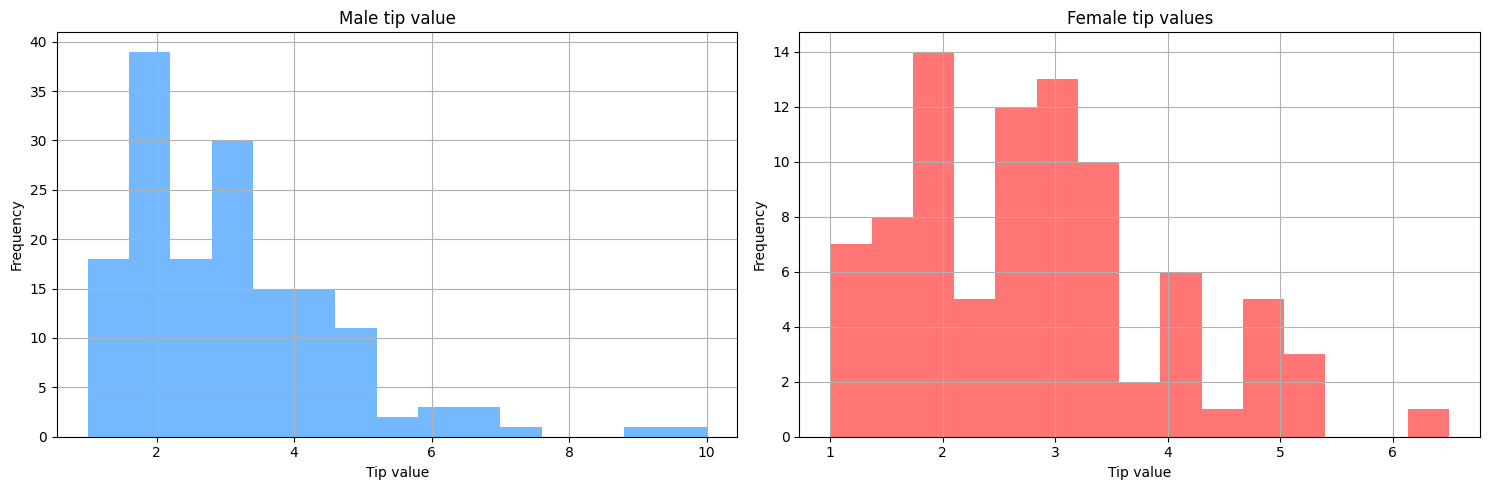

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: Histogram of tip values
axes[0].hist(male_df['tip'], bins = 15, color="#74b9ff")
axes[0].set_xlabel("Tip value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Male tip value")
axes[0].grid(True)

# Chart 2: Histogram of total bill values
axes[1].hist(female_df['tip'], bins = 15, color="#ff7675")
axes[1].set_xlabel("Tip value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Female tip values")
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display all three charts in one row
plt.show()

In [ ]:
print(f"total male tip amount: {male_df['tip'].sum()}")
print(f"total female tip amount: {round(female_df['tip'].sum(),2)}")
print(f"rate male/female: {round(male_df['tip'].sum()/female_df['tip'].sum(),2)} ")

total male tip amount: 485.07
total female tip amount: 246.51
rate male/female: 1.97 


**2. Insight 2**

In terms of gender, it is evident that males leave tips almost twice as much as females.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [ ]:
weekend_df = df.query('day == "Sat" | day == "Sun"')
weekday_df = df.query('day == "Mon" | day == "Tue" | day == "Wed" | day == "Thu" | day == "Fri"')

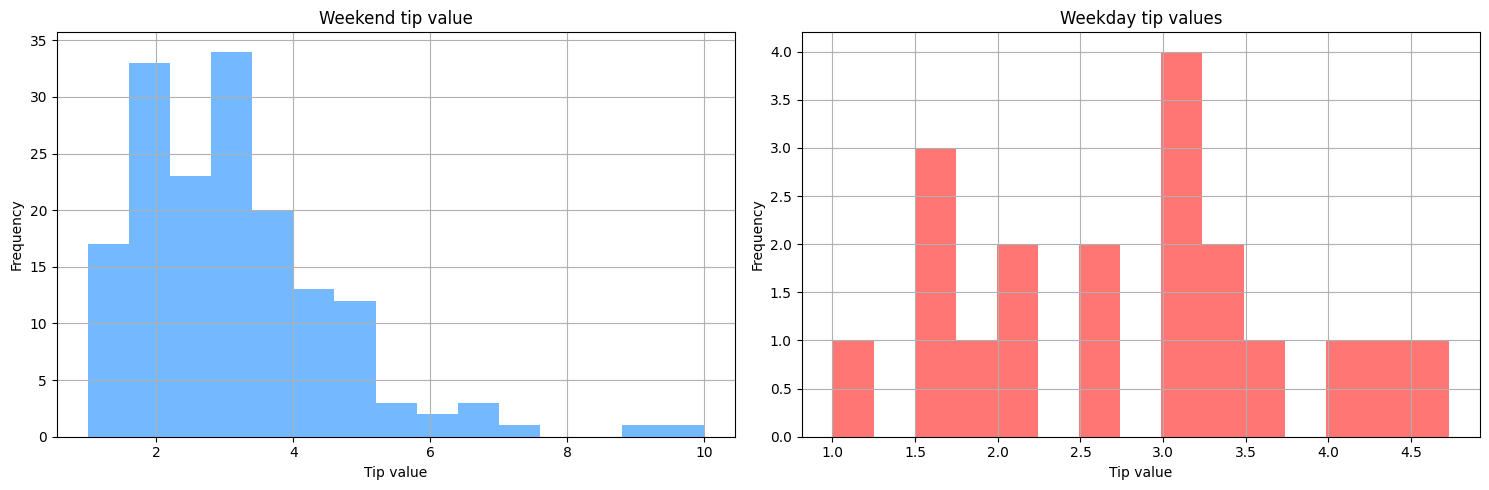

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: Histogram of tip values
axes[0].hist(weekend_df['tip'], bins = 15, color="#74b9ff")
axes[0].set_xlabel("Tip value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Weekend tip value")
axes[0].grid(True)

# Chart 2: Histogram of total bill values
axes[1].hist(weekday_df['tip'], bins = 15, color="#ff7675")
axes[1].set_xlabel("Tip value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Weekday tip values")
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display all three charts in one row
plt.show()

In [ ]:
print(f"weekday tip amount: {weekday_df['tip'].sum()}")
print(f"weekend tip amount: {round(weekend_df['tip'].sum(),2)}")
print(f"rate weekend/weekday: {round(weekend_df['tip'].sum()/weekday_df['tip'].sum(),2)} ")

weekday tip amount: 51.959999999999994
weekend tip amount: 507.79
rate weekend/weekday: 9.77 


**3. Insight 3**


With regards to the day of the week, customers primarily tip on weekends, with the tip amount being nearly 10 times higher than on weekdays.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

In [ ]:
dinner_df = df.query('time == "Dinner"')
lunch_df = df.query('time == "Lunch"')

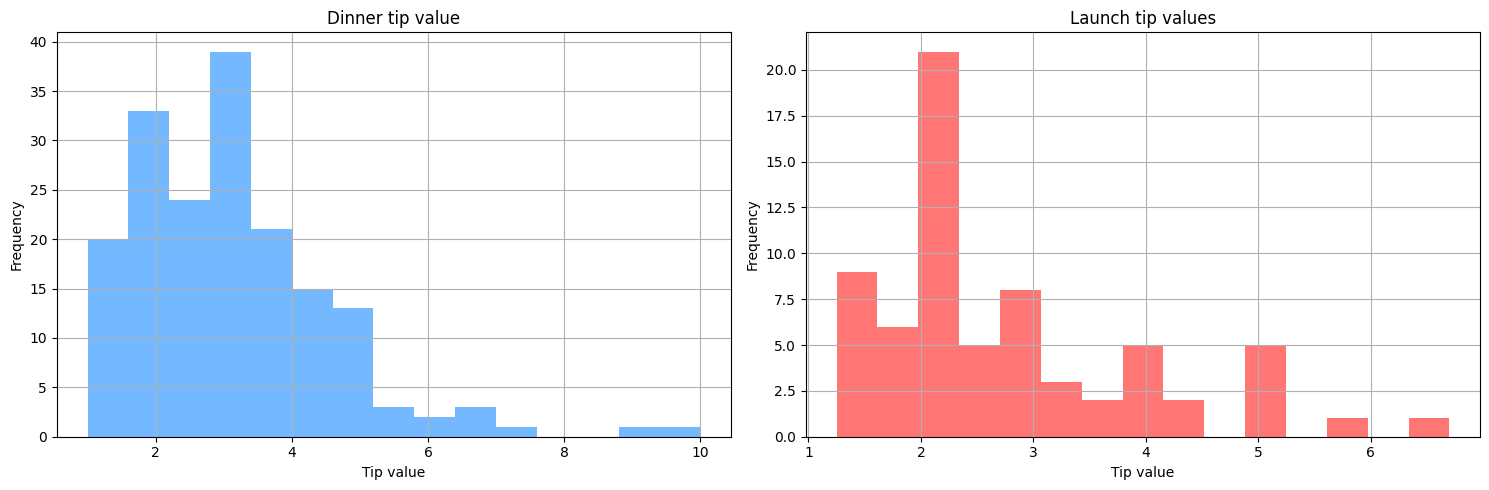

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: Histogram of tip values
axes[0].hist(dinner_df['tip'], bins = 15, color="#74b9ff")
axes[0].set_xlabel("Tip value")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Dinner tip value")
axes[0].grid(True)

# Chart 2: Histogram of total bill values
axes[1].hist(lunch_df['tip'], bins = 15, color="#ff7675")
axes[1].set_xlabel("Tip value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Launch tip values")
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display all three charts in one row
plt.show()

In [ ]:
print(f"Dinner tip amount: {round(dinner_df['tip'].sum(),2)}")
print(f"Launch tip amount: {round(lunch_df['tip'].sum(),2)}")
print(f"rate Dinner/Launch: {round(dinner_df['tip'].sum()/lunch_df['tip'].sum(),2)} ")

Dinner tip amount: 546.07
Launch tip amount: 185.51
rate Dinner/Launch: 2.94 


In [ ]:
print(f" frequency tip from 2.5 dollars at lunch: {lunch_df.query('2 <= tip <= 2.5').count()}")
print(f"percentage over all lunch tips: {round(lunch_df.query('2 <= tip <= 2.5').count()/lunch_df.count(),2)}")

 frequency tip from 2.5 dollars at lunch: id            24
total_bill    24
tip           24
sex           24
smoker        24
day           24
time          24
size          24
dtype: int64
percentage over all lunch tips: id            0.35
total_bill    0.35
tip           0.35
sex           0.35
smoker        0.35
day           0.35
time          0.35
size          0.35
dtype: float64


<ipython-input-139-a96aeece6416>:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print(f" frequency tip from 2.5 dollars at lunch: {lunch_df.query('2 <= tip <= 2.5').count()}")
<ipython-input-139-a96aeece6416>:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print(f"percentage over all lunch tips: {round(lunch_df.query('2 <= tip <= 2.5').count()/lunch_df.count(),2)}")


**4. Insight 4**


Regarding tipping time, dinner tips are approximately three times higher than lunch tips. During dinner, customers typically tip between 1 and 5 dollars, with 3 dollars being the most common amount. Notably, at lunch, tips often range from 2 to 2.5 dollars, accounting for 35% of all lunch tips.